In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Hyperparameters
input_size=1
output_size=1
num_epochs=100
learning_rate=1e-3
momentum=0


In [3]:
# Toy dataset
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
# Linear Regression model
model=nn.Linear(input_size,output_size)

In [5]:
# Loss and optimizer
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=learning_rate,momentum=momentum)

# Send model to GPU
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model.to(device)

print(f'Model is running on :{device}')

Model is running on :cuda


In [6]:
# Training loop
start_time=time.time()
for epoch in range(num_epochs):
  # convert to Tensors
  inputs=torch.from_numpy(x_train).to(device)
  targets=torch.from_numpy(y_train).to(device)

  # forward pass
  outputs=model(inputs)

  # Backward pass and optimization
  optimizer.zero_grad()
  loss=criterion(outputs,targets)
  loss.backward()
  optimizer.step()

  if(epoch+1) % 5==0:
    print(f'Epoch: {epoch+1}/{num_epochs} Loss={loss.item():.4f}')
end_time=time.time()

print(f'Time lapsed: {end_time-start_time} s')

Epoch: 5/100 Loss=12.3870
Epoch: 10/100 Loss=5.1284
Epoch: 15/100 Loss=2.1877
Epoch: 20/100 Loss=0.9964
Epoch: 25/100 Loss=0.5138
Epoch: 30/100 Loss=0.3182
Epoch: 35/100 Loss=0.2390
Epoch: 40/100 Loss=0.2068
Epoch: 45/100 Loss=0.1938
Epoch: 50/100 Loss=0.1885
Epoch: 55/100 Loss=0.1863
Epoch: 60/100 Loss=0.1854
Epoch: 65/100 Loss=0.1850
Epoch: 70/100 Loss=0.1848
Epoch: 75/100 Loss=0.1847
Epoch: 80/100 Loss=0.1847
Epoch: 85/100 Loss=0.1846
Epoch: 90/100 Loss=0.1846
Epoch: 95/100 Loss=0.1845
Epoch: 100/100 Loss=0.1845
Time lapsed: 0.7684879302978516 s


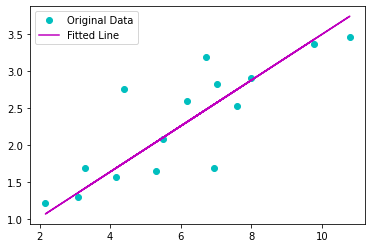

In [7]:
# Plot the graphs
predicted=model(torch.from_numpy(x_train).to(device)).cpu().detach().numpy()
plt.plot(x_train,y_train,'co',label='Original Data')
plt.plot(x_train,predicted,'m-',label='Fitted Line')
plt.legend()
plt.show()


In [8]:
# save the model
torch.save(model.state_dict(),'model_LR.pth')